# Linear Regression Practice

In this notebook we'll practice linear regresssions on a new data set of real estate transactions from Sacramento.

Start by [downloading](https://trello-attachments.s3.amazonaws.com/5679b2e91535c674fadb2efe/56b39dbfc8bbe91b11d49e9f/bb26a8e51e1bb392f94c7d7f045b875c/Sacramentorealestatetransactions.csv) the data.

In the next cell load the data using pandas. Once you have a data frame, use `data.head()` to look at the first few rows.

In [3]:
import seaborn as sns
%matplotlib inline
import pandas as pd

filename = "../../assets/datasets/Sacramentorealestatetransactions.csv"

data = pd.read_csv(filename)

# We need to process the dates to be datetime variables
data["sale_date"] = pd.to_datetime(data["sale_date"])

data.head(2)
#data.dtypes

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,2008-05-21 04:00:00,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,2008-05-21 04:00:00,68212,38.478902,-121.431028


## Exploratory Analysis

Use pandas to look through the data. Plot the variables as histograms or pairs in scatter plots as needed with seaborn until you understand each one.

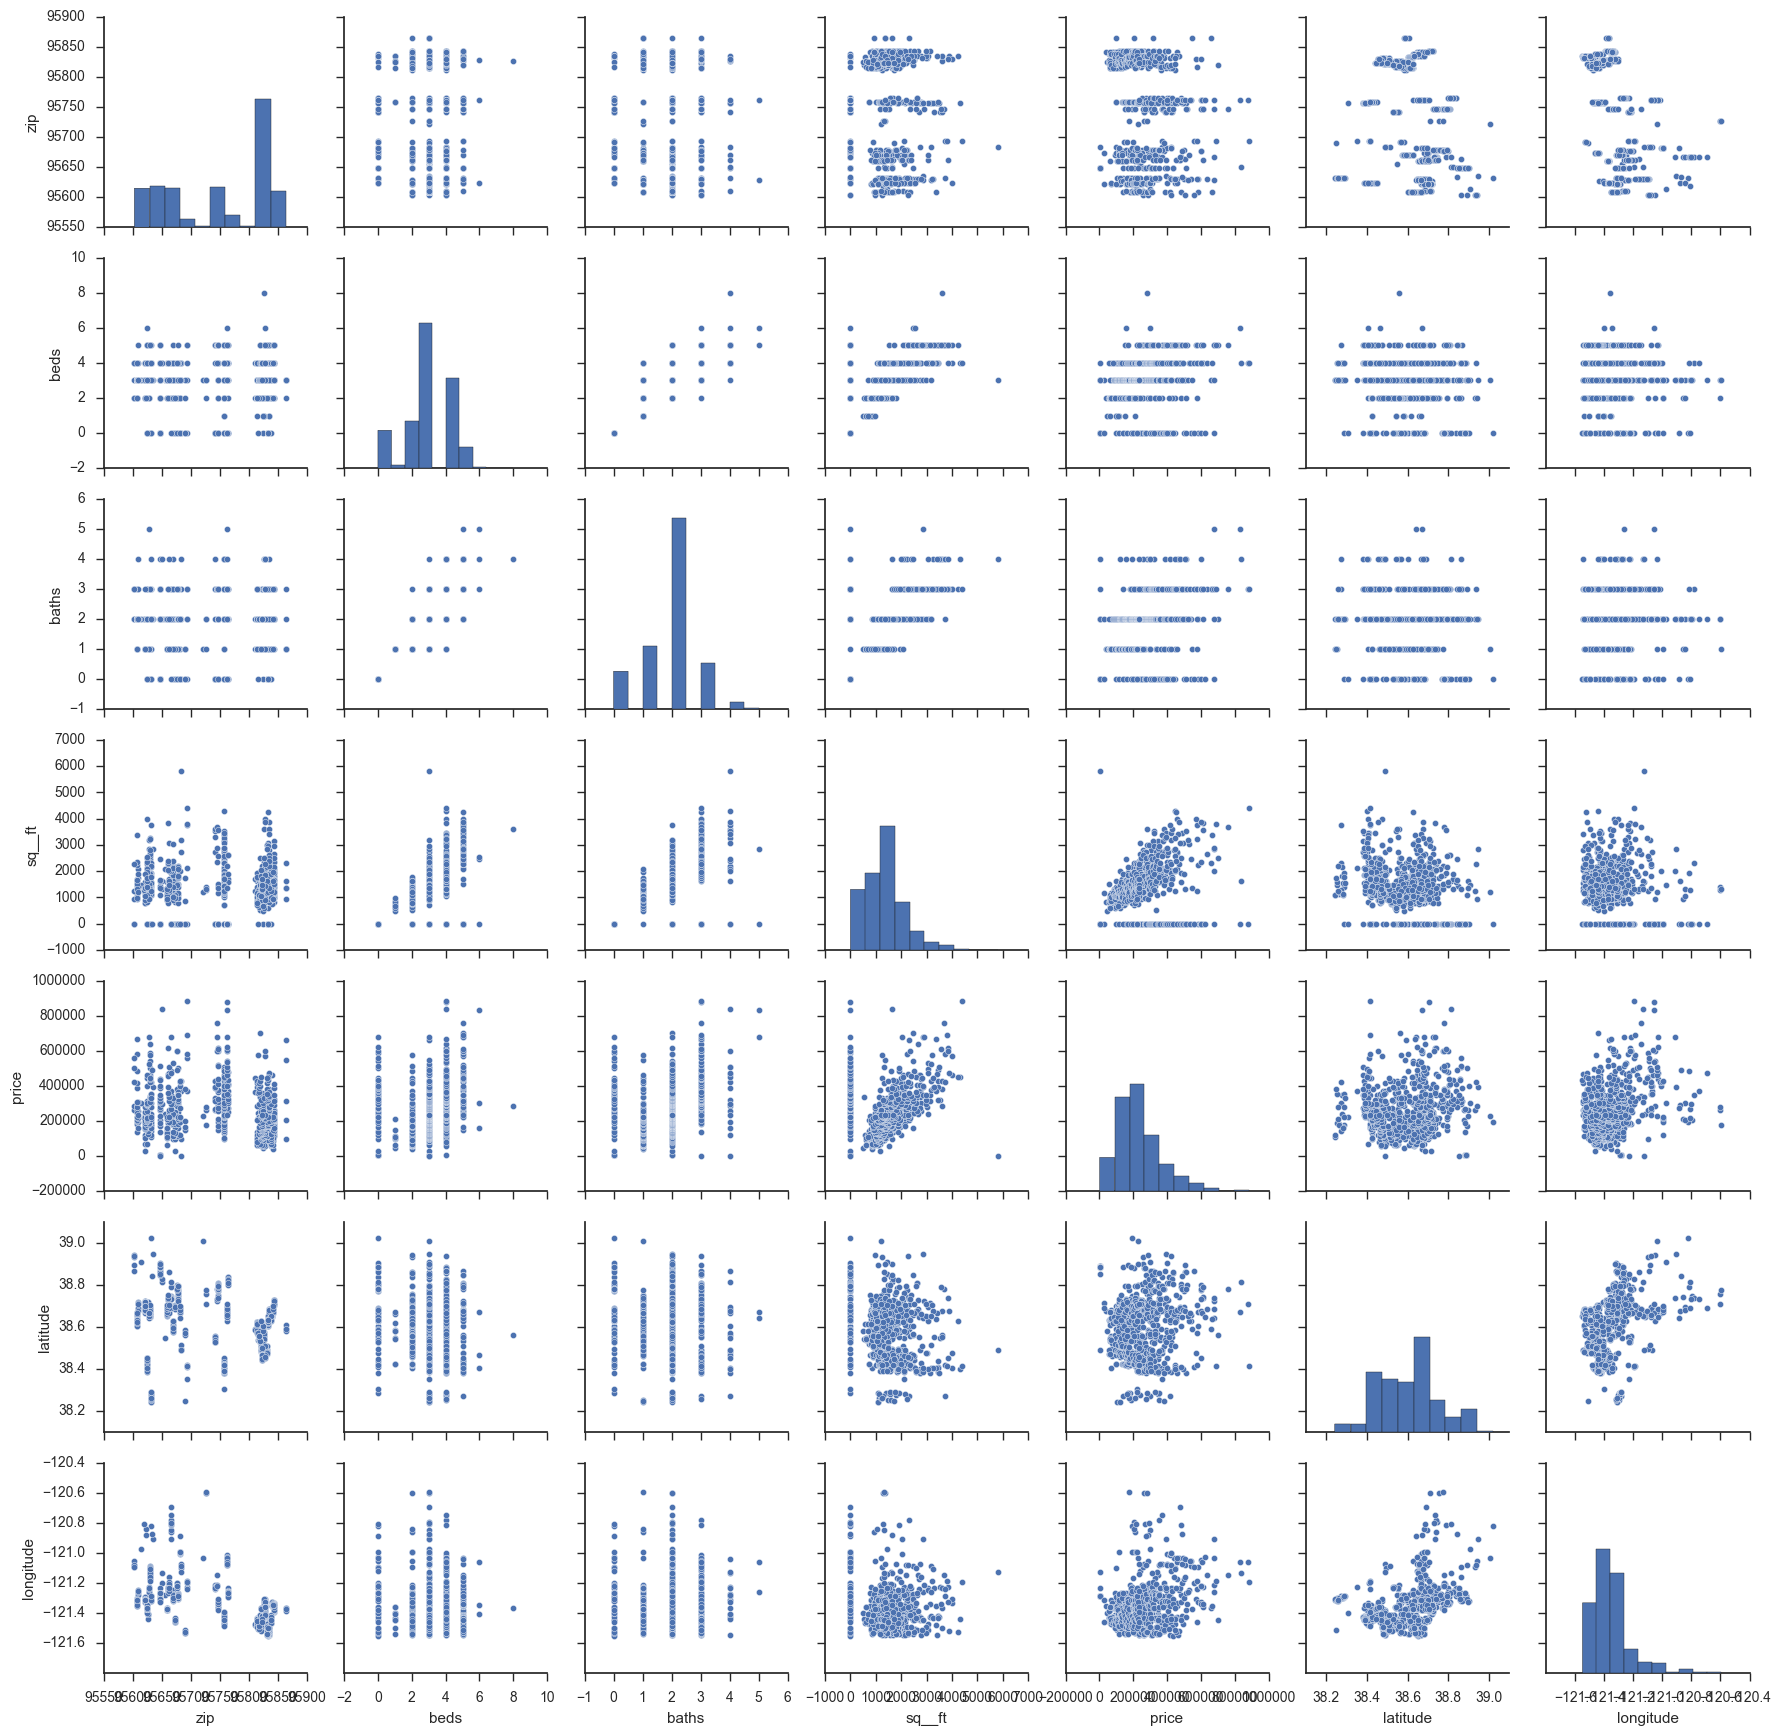

In [4]:
 sns.set(style="ticks", color_codes=True)
sns.pairplot(data)

## Visualize the Data
The data set contains a number of variables that may be correlated with the price of the properties. Make plots of the relevant variables versus the column "price". You can use pandas, matplotlib, or seaborn.

In [5]:
import seaborn as sns
from matplotlib import pyplot as plt



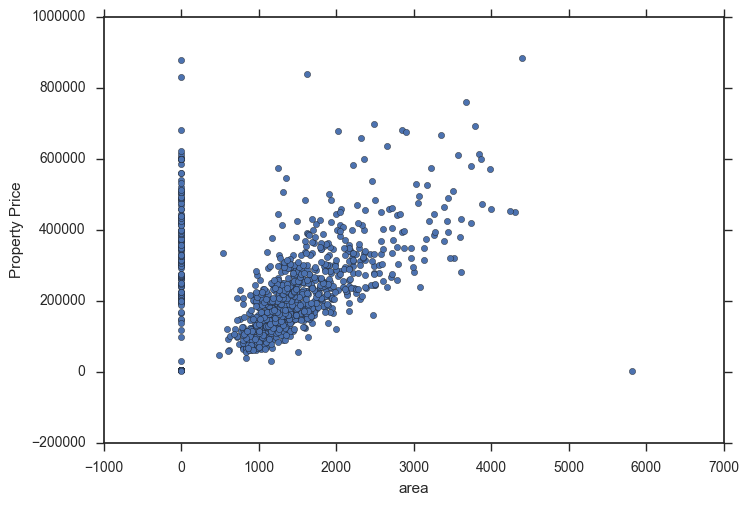

In [6]:
x = data['sq__ft']
y = data['price']

plt.scatter(x, y)
plt.xlabel("area")
plt.ylabel("Property Price")
plt.show()

its seems like there is relation between area and property price. 

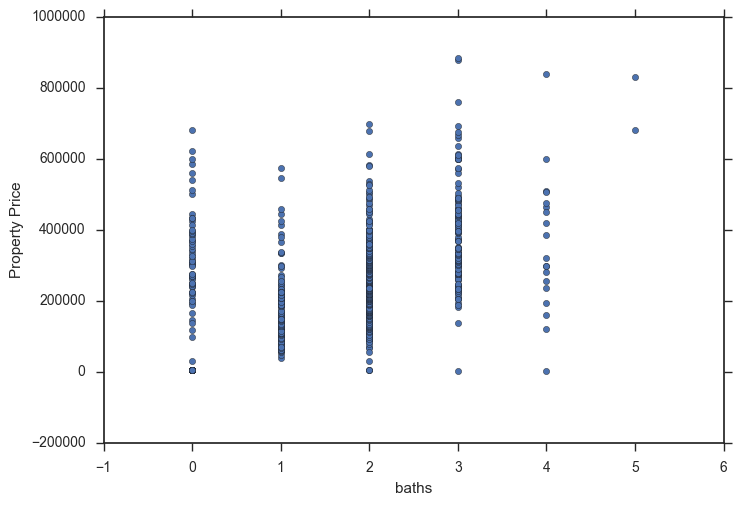

In [7]:
x = data['baths']
y = data['price']

plt.scatter(x, y)
plt.xlabel("baths")
plt.ylabel("Property Price")
plt.show()

In [8]:
data.corr()

,zip,beds,baths,sq__ft,price,latitude,longitude
zip,1.000000,0.125319,0.069165,0.130108,-0.093353,-0.290389,-0.539904
beds,0.125319,1.000000,0.839650,0.684041,0.342024,-0.291307,-0.053993
baths,0.069165,0.839650,1.000000,0.665690,0.416208,-0.235792,0.016582
sq__ft,0.130108,0.684041,0.665690,1.000000,0.333897,-0.383274,-0.177742
price,-0.093353,0.342024,0.416208,0.333897,1.000000,-0.039573,0.284485
latitude,-0.290389,-0.291307,-0.235792,-0.383274,-0.039573,1.000000,0.387925
longitude,-0.539904,-0.053993,0.016582,-0.177742,0.284485,0.387925,1.000000


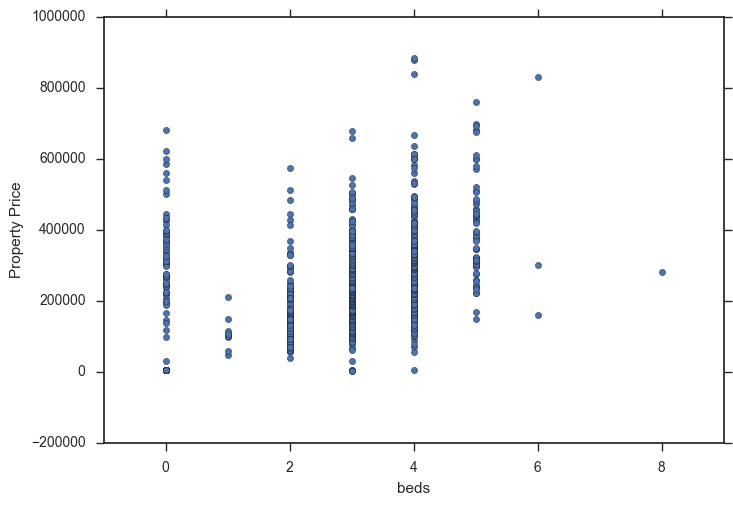

In [9]:
x = data['beds']
y = data['price']

plt.scatter(x, y)
plt.xlabel("beds")
plt.ylabel("Property Price")
plt.show()

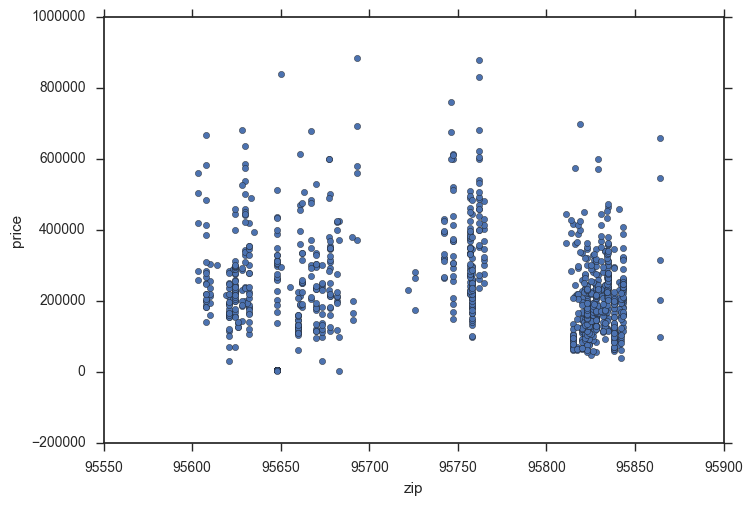

In [10]:
dfScatter = data
#x = "zip"
#y = "price"
dfScatter.plot(kind='scatter', x = "zip", y ="price" )
# plt.scatter(x, y)
# plt.xlabel("zip")
# plt.ylabel("Property Price")
#dfScatter.plot(kind='scatter', x, y)
#plt.show()

## Regressions

* Perform a series of regressions on various combinations of the independent variables.
* Plot the predicted values versus the true values
* Which combinations gives the best fit?

In [11]:
import statsmodels.api as sm


In [19]:
X = data["sq__ft"]
#X = sm.add_constant(X)
y = data["price"]
model = sm.OLS(y,X).fit()
predictions = model.predict(X)
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.664
Model:                            OLS   Adj. R-squared:                  0.664
Method:                 Least Squares   F-statistic:                     1944.
Date:                Sun, 13 Nov 2016   Prob (F-statistic):          3.07e-235
Time:                        09:36:37   Log-Likelihood:                -13186.
No. Observations:                 985   AIC:                         2.637e+04
Df Residuals:                     984   BIC:                         2.638e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
sq__ft       141.3912      3.207     44.092      0.000       135.098   147.684
==============================================================================
Omnibus:                      361.822   Durbin-Watson:                   0.918
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1539.871
Skew:                           1.693   Prob(JB):                         0.00
Kurtosis:                       8.104   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

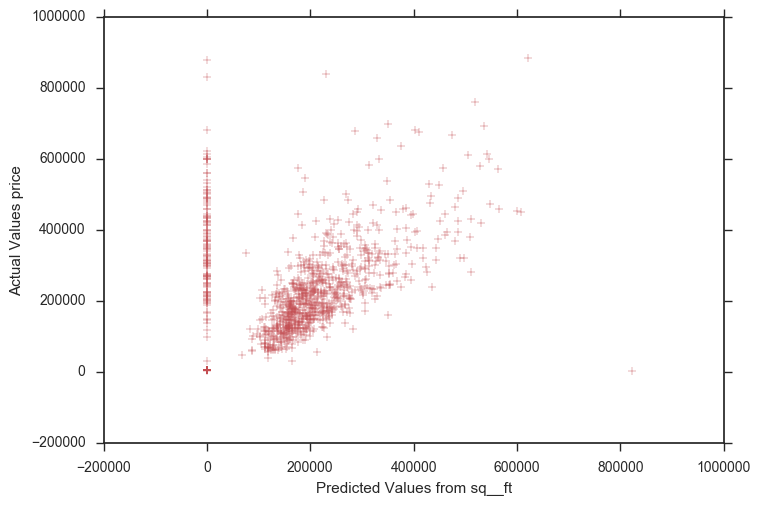

In [13]:
plt.scatter(predictions, y,s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values from sq__ft")
plt.ylabel("Actual Values price")
plt.show()

In [14]:
X = data["zip"]
#X = sm.add_constant(X)
y = data["price"]
model = sm.OLS(y,X).fit()
predictions = model.predict(X)
model.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     2820.
Date:                Sun, 13 Nov 2016   Prob (F-statistic):          3.72e-291
Time:                        09:36:00   Log-Likelihood:                -13057.
No. Observations:                 985   AIC:                         2.612e+04
Df Residuals:                     984   BIC:                         2.612e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
zip            2.4452      0.046     53.099      0.000         2.355     2.536
==============================================================================
Omnibus:                      185.105   Durbin-Watson:                   0.143
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              367.102
Skew:                           1.087   Prob(JB):                     1.93e-80
Kurtosis:                       5.054   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

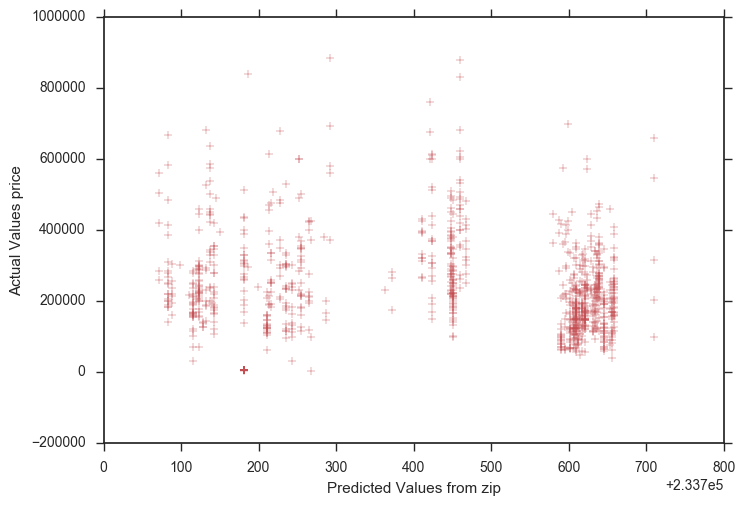

In [15]:
plt.scatter(predictions, y,s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values from zip")
plt.ylabel("Actual Values price")
plt.show()

In [16]:
X = data[["beds","baths"]]
#X = sm.add_constant(X)
y = data["price"]
model = sm.OLS(y,X).fit()
predictions = model.predict(X)
model.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     1497.
Date:                Sun, 13 Nov 2016   Prob (F-statistic):          4.83e-299
Time:                        09:36:00   Log-Likelihood:                -13035.
No. Observations:                 985   AIC:                         2.607e+04
Df Residuals:                     983   BIC:                         2.608e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
beds        2.681e+04   5509.130      4.866      0.000       1.6e+04  3.76e+04
baths       7.644e+04   8838.918      8.648      0.000      5.91e+04  9.38e+04
==============================================================================
Omnibus:                      282.709   Durbin-Watson:                   0.814
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              754.765
Skew:                           1.478   Prob(JB):                    1.27e-164
Kurtosis:                       6.108   Cond. No.                         8.97
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

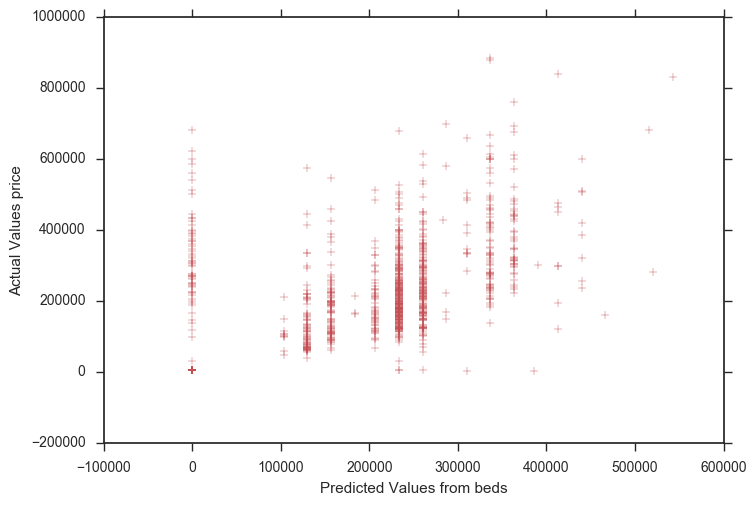

In [17]:
plt.scatter(predictions, y,s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values from beds")
plt.ylabel("Actual Values price")
plt.show()

In [18]:

X = data["street"]
#X = sm.add_constant(X)
y = data["price"]
model = sm.OLS(y,X).fit()
predictions = model.predict(X)
model.summary()



ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [ ]:
plt.scatter(predictions, y,s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values from beds")
plt.ylabel("Actual Values price")
plt.show()

## Bonus Exercises

* Find the best model you can with the three variables
* Are longitude and latitude useful separately? Try adding each and both to another model and look for mean_squared_error improvement
* Can you find any significant correlations between the non-price variables? Which ones?